In [1]:
import numpy as np
import scipy as sp
import scipy.sparse.linalg as linalg
import matplotlib.pyplot as plt
%matplotlib inline

# Task 2: 1D Periodic Multilayer Dielectric Slab, Eigenmode formulation

## Maxwell Equations (time domain)
\begin{equation}
\nabla \times E = - \mu \frac{\partial H}{\partial t}
\end{equation}

\begin{equation}
\nabla \times H = \epsilon \frac{\partial E}{\partial t}
\end{equation}

## Time Domain $\rightarrow$ Frequency Domain

Using the Fourier transform we get:

\begin{equation}
E(r, t) \rightarrow E(r, \omega)
\end{equation}

\begin{equation}
\frac{\partial E}{\partial t} \rightarrow i\omega E
\end{equation}

Thus our wave equation transforms into:

\begin{equation}
\nabla E = - i \omega \mu H
\end{equation}

\begin{equation}
\nabla E = - i \omega \epsilon E
\end{equation}

## 1D Coordinates, Periodic

\begin{equation}
{H_y}_{i}, {E_z}_{i+\frac{1}{2}}, i \in \mathcal{N}
\end{equation}

\begin{equation}
{H_y}_{0} = {H_y}_{n} e^{ik_x a}
\end{equation}

\begin{equation}
{E_z}_{0+\frac{1}{2}} = {E_z}_{n+\frac{1}{2}} e^{ik_x a}
\end{equation}

\begin{equation}
\frac{\partial E_z}{\partial x} = - i \omega \mu H_y
\end{equation}

\begin{equation}
\frac{\partial H_y}{\partial x} = i \omega \epsilon E_z
\end{equation}

## Discretization
\begin{equation}
\frac{\partial {E_z}_i}{\partial x} \approx \frac{{E_z}_{i+1} - {E_z}_{i-1}}{\Delta x}
\end{equation}

\begin{equation}
\frac{\partial {E_z}_0}{\partial x} \approx \frac{{E_z}_{1} - {E_z}_{n}e^{i k_x a}}{\Delta x}
\end{equation}

\begin{equation}
\frac{\partial {E_z}_n}{\partial x} \approx \frac{{E_z}_{0}e^{i k_x a} - {E_z}_{n-1}}{\Delta x}
\end{equation}

Forward difference
\begin{equation}
-i\omega\mu_i {E_z}_{i+\frac{1}{2}} \approx \frac{{H_y}_{i+1} - {H_y}_{i}}{\Delta x}
\end{equation}

Backward difference
\begin{equation}
-i\omega\epsilon_i {H_y}_{i} \approx \frac{{E_z}_{i+\frac{1}{2}} - {E_z}_{i-\frac{1}{2}}}{\Delta x}
\end{equation}

## Wave equation

\begin{equation}
{H_y}_i = \frac{i}{\omega \mu_i }\frac{\partial {E_z}_i}{\partial x}
\end{equation}

\begin{equation}
{E_z}_i = \frac{-i}{\omega \epsilon_i }\frac{\partial {H_y}_i}{\partial x}
\end{equation}

\begin{equation}
\frac{\partial}{\partial x}\frac{i}{\omega \mu_i }\frac{\partial}{\partial x} {E_z}_i = i \omega \epsilon_i {E_z}_i
\end{equation}

\begin{equation}
\frac{1}{\epsilon_i}\frac{\partial}{\partial x}\frac{1}{\mu_i}\frac{\partial}{\partial x} {E_z}_i = \omega^2 {E_z}_i
\end{equation}

or
\begin{equation}
\frac{1}{\mu_i}\frac{\partial}{\partial x}\frac{1}{\epsilon_i}\frac{\partial}{\partial x} {H_y}_i = \omega^2 {H_y}_i
\end{equation}

## Matrix form
\begin{equation}
{H_y}_i = \frac{i}{\omega \mu_i }\frac{\partial E_z}{\partial x} \approx \frac{i}{\omega \mu_i }\frac{{E_z}_{i+\frac{1}{2}} - {E_z}_{i-\frac{1}{2}}}{\Delta x}
\end{equation}

\begin{equation}
\begin{bmatrix}
    {H_y}_{0} \\
    {H_y}_{1} \\
    \vdots \\
    {H_y}_{n-1} \\    
    {H_y}_{n}    
\end{bmatrix} 
=
\frac{i}{\omega \Delta x}
\begin{bmatrix}
    \frac{1}{\mu_0}  & 0      & 0      & \dots  & 0      \\
    0      & \frac{1}{\mu_1}  & 0      & \dots  & 0      \\
    0      & 0      & \frac{1}{\mu_2}  & \dots  & \vdots \\
    \vdots & \vdots & \vdots & \ddots & 0      \\
    0      & 0      & \dots  & 0      & \frac{1}{\mu_n}
\end{bmatrix}
\begin{bmatrix}
    1      & 0      & 0      & \dots  & -e^{i k_x a}      \\
    -1     & 1      & 0      & \dots  & 0      \\
    0      & -1     & 1      & \dots  & \vdots \\
    \vdots & \vdots & \vdots & \ddots & 0      \\
    0      & 0      & \dots  & -1     & 1
\end{bmatrix}
\begin{bmatrix}
    {E_z}_{0+\frac{1}{2}} \\
    {E_z}_{1+\frac{1}{2}} \\
    \vdots \\
    {E_z}_{n-\frac{1}{2}} \\    
    {E_z}_{n+\frac{1}{2}}    
\end{bmatrix} 
\end{equation}

\begin{equation}
{E_z}_{i+\frac{1}{2}} = \frac{-i}{\omega \epsilon_i }\frac{\partial {H_y}_i}{\partial x} \approx \frac{-i}{\omega \epsilon_i } \frac{{H_y}_{i+1} - {H_y}_{i}}{\Delta x}
\end{equation}

\begin{equation}
\begin{bmatrix}
    {E_z}_{0+\frac{1}{2}} \\
    {E_z}_{1+\frac{1}{2}} \\
    \vdots \\
    {E_z}_{n-\frac{1}{2}} \\    
    {E_z}_{n+\frac{1}{2}}    
\end{bmatrix}
=
\frac{i}{\omega \Delta x}
\begin{bmatrix}
    \frac{1}{\epsilon_0}  & 0      & 0      & \dots  & 0      \\
    0      & \frac{1}{\epsilon_1}  & 0      & \dots  & 0      \\
    0      & 0      & \frac{1}{\epsilon_2}  & \dots  & \vdots \\
    \vdots & \vdots & \vdots & \ddots & 0      \\
    0      & 0      & \dots  & 0      & \frac{1}{\epsilon_n}
\end{bmatrix}
\begin{bmatrix}
    -1     & 1      & 0      & \dots  & 0      \\
    0      & -1     & 1      & \dots  & 0      \\
    0      & 0      & -1     & \dots  & \vdots \\
    \vdots & \vdots & \vdots & \ddots & 1      \\
    e^{i k_x a}      & 0      & \dots  & 0      & -1
\end{bmatrix}
\begin{bmatrix}
    {H_y}_{0} \\
    {H_y}_{1} \\
    \vdots \\
    {H_y}_{n-1} \\    
    {H_y}_{n}    
\end{bmatrix} 
\end{equation}

\begin{equation}
\omega^2 E_z = \frac{1}{\epsilon}\frac{\partial}{\partial x}\frac{1}{\mu}\frac{\partial}{\partial x} E_z
\end{equation}

\begin{equation}
\omega^2
\begin{bmatrix}
    {E_z}_{0+\frac{1}{2}} \\
    {E_z}_{1+\frac{1}{2}} \\
    \vdots \\
    {E_z}_{n-\frac{1}{2}} \\    
    {E_z}_{n+\frac{1}{2}}    
\end{bmatrix}
=
\frac{i}{\Delta x}
\begin{bmatrix}
    \frac{1}{\epsilon_0}  & 0      & 0      & \dots  & 0      \\
    0      & \frac{1}{\epsilon_1}  & 0      & \dots  & 0      \\
    0      & 0      & \frac{1}{\epsilon_2}  & \dots  & \vdots \\
    \vdots & \vdots & \vdots & \ddots & 0      \\
    0      & 0      & \dots  & 0      & \frac{1}{\epsilon_n}
\end{bmatrix}
\begin{bmatrix}
    -1     & 1      & 0      & \dots  & 0      \\
    0      & -1     & 1      & \dots  & 0      \\
    0      & 0      & -1     & \dots  & \vdots \\
    \vdots & \vdots & \vdots & \ddots & 1      \\
    e^{i k_x a}      & 0      & \dots  & 0      & -1
\end{bmatrix}
\frac{i}{\Delta x}
\begin{bmatrix}
    \frac{1}{\mu_0}  & 0      & 0      & \dots  & 0      \\
    0      & \frac{1}{\mu_1}  & 0      & \dots  & 0      \\
    0      & 0      & \frac{1}{\mu_2}  & \dots  & \vdots \\
    \vdots & \vdots & \vdots & \ddots & 0      \\
    0      & 0      & \dots  & 0      & \frac{1}{\mu_n}
\end{bmatrix}
\begin{bmatrix}
    1      & 0      & 0      & \dots  & -e^{i k_x a}      \\
    -1     & 1      & 0      & \dots  & 0      \\
    0      & -1     & 1      & \dots  & \vdots \\
    \vdots & \vdots & \vdots & \ddots & 0      \\
    0      & 0      & \dots  & -1     & 1
\end{bmatrix}
\begin{bmatrix}
    {E_z}_{0+\frac{1}{2}} \\
    {E_z}_{1+\frac{1}{2}} \\
    \vdots \\
    {E_z}_{n-\frac{1}{2}} \\    
    {E_z}_{n+\frac{1}{2}}    
\end{bmatrix} 
\end{equation}

or, simplifing, and replacing $i+\frac{1}{2}$ with $i$:


\begin{equation}
\omega^2
\begin{bmatrix}
    {E_z}_{0} \\
    {E_z}_{1} \\
    \vdots \\
    {E_z}_{n-1} \\    
    {E_z}_{n}    
\end{bmatrix}
=
- \frac{1}{\Delta x^2}
\begin{bmatrix}
    \frac{1}{\epsilon_0}  & 0      & 0      & \dots  & 0      \\
    0      & \frac{1}{\epsilon_1}  & 0      & \dots  & 0      \\
    0      & 0      & \frac{1}{\epsilon_2}  & \dots  & \vdots \\
    \vdots & \vdots & \vdots & \ddots & 0      \\
    0      & 0      & \dots  & 0      & \frac{1}{\epsilon_n}
\end{bmatrix}
\begin{bmatrix}
    -1     & 1      & 0      & \dots  & 0      \\
    0      & -1     & 1      & \dots  & 0      \\
    0      & 0      & -1     & \dots  & \vdots \\
    \vdots & \vdots & \vdots & \ddots & 1      \\
    e^{i k_x a}      & 0      & \dots  & 0      & -1
\end{bmatrix}
\begin{bmatrix}
    \frac{1}{\mu_0}  & 0      & 0      & \dots  & 0      \\
    0      & \frac{1}{\mu_1}  & 0      & \dots  & 0      \\
    0      & 0      & \frac{1}{\mu_2}  & \dots  & \vdots \\
    \vdots & \vdots & \vdots & \ddots & 0      \\
    0      & 0      & \dots  & 0      & \frac{1}{\mu_n}
\end{bmatrix}
\begin{bmatrix}
    1      & 0      & 0      & \dots  & -e^{i k_x a}      \\
    -1     & 1      & 0      & \dots  & 0      \\
    0      & -1     & 1      & \dots  & \vdots \\
    \vdots & \vdots & \vdots & \ddots & 0      \\
    0      & 0      & \dots  & -1     & 1
\end{bmatrix}
\begin{bmatrix}
    {E_z}_{0} \\
    {E_z}_{1} \\
    \vdots \\
    {E_z}_{n-1} \\    
    {E_z}_{n}    
\end{bmatrix} 
\end{equation}

## Boundary Conditions

In this case the boundary conditions are periodic, satisfied by the $e^{i k_x a}$ elements in the resulting matrix

# Implementation
## Setup grid

In [20]:
n=1000          # number of grid nodes

dx=1/n         # discretization step, domain size = 1

eps1 = 13      # Layer 1
eps2 = 1       # Layer 2

num_eigs = 6   # Solver for first # eigenmodes

## Build matrix

In [24]:
# Material parameters distribution

eps = np.ones(n)
eps[:int(n/2)] = 1/eps1
eps[int(n/2):] = 1/eps2

eps = sp.sparse.dia_matrix(([eps], [0]), [n,n])

# Forward

diag = np.ones(n) * -1/dx
up_diag = np.ones(n) * 1/dx

M_1 = sp.sparse.dia_matrix(([up_diag, diag], [1, 0]), [n,n])
# Backward

diag = np.ones(n) * 1/dx
up_diag = np.ones(n) * -1/dx

M_2 = sp.sparse.dia_matrix(([up_diag, diag], [-1, 0]), [n,n])

M_1 = sp.sparse.lil_matrix(M_1)
M_2 = sp.sparse.lil_matrix(M_2)

## Solve for eigenmodes

In [25]:
kk0 = 2*sp.pi*np.linspace(-0.5,0.5,300) # k-vector in medium with eps1-eps2

k = np.zeros((num_eigs, kk0.size), dtype=complex)
for ik in range(kk0.size):
    k0=kk0[ik]
     
    M_1[n-1, 0] = np.cos(k0*1)/dx # to impose periodic boundary conditions    
    M_2[0, n-1] = -np.cos(k0*1)/dx
    
    M = -eps*M_2*M_1
    
    kt = k0/np.sqrt((eps1+eps2)/2); # target k=w/c
    k2, V = linalg.eigs(M, k=num_eigs, M=None, sigma=kt**2)
    
    k[:,ik] = np.sqrt(k2) # k=w/c

## Plot eigenmodes
### Bands

(0.0, 1.5)

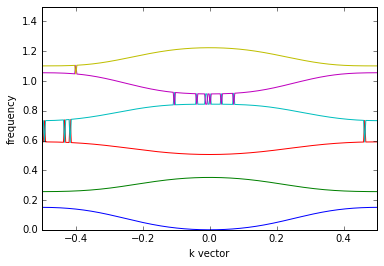

In [26]:
for i in range(num_eigs):
    plt.hold(True)
    plt.plot(kk0/(2*sp.pi), np.real(k[i,:]/(2*sp.pi)) ,'-')
    
plt.xlabel("k vector")
plt.ylabel("frequency")
plt.xlim([-0.5, 0.5])
plt.ylim([0.0, 1.5])

### Field distribution

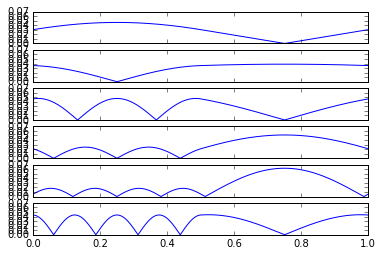

In [27]:
f, ax = plt.subplots(6,1, sharex=True, sharey=True)

for i in range(num_eigs):
    ax[i].plot(np.linspace(0, 1, n), np.abs(V[:,i]),'-')

## Permittivity Contrast Bandgap dependence

In [53]:
def build_bandgap_diagram(eps1, eps2, num_eigs=6):
    n=200          # number of grid nodes

    dx=1/n         # discretization step, domain size = 1
    
    # Material parameters distribution

    eps = np.ones(n)
    eps[:int(n/2)-1] = 1/eps1
    eps[int(n/2):] = 1/eps2

    eps = sp.sparse.dia_matrix(([eps], [0]), [n,n])

    # Forward

    diag = np.ones(n) * -1/dx
    up_diag = np.ones(n) * 1/dx

    M_1 = sp.sparse.dia_matrix(([up_diag, diag], [1, 0]), [n,n])
    # Backward

    diag = np.ones(n) * 1/dx
    up_diag = np.ones(n) * -1/dx

    M_2 = sp.sparse.dia_matrix(([up_diag, diag], [-1, 0]), [n,n])

    M_1 = sp.sparse.lil_matrix(M_1)
    M_2 = sp.sparse.lil_matrix(M_2)

    kk0 = 2*sp.pi*np.linspace(-0.5,0.5,300) # k-vector in medium with eps1-eps2

    k = np.zeros((num_eigs, kk0.size), dtype=complex)
    for ik in range(kk0.size):
        k0=kk0[ik]

        M_1[n-1, 0] = np.cos(k0*1)/dx # to impose periodic boundary conditions    
        M_2[0, n-1] = -np.cos(k0*1)/dx

        M = -eps*M_2*M_1

        kt = k0/np.sqrt((eps1+eps2)/2); # target k=w/c
        k2, V = linalg.eigs(M, k=num_eigs, M=None, sigma=kt**2)

        k[:,ik] = np.sqrt(k2) # k=w/c
    
    return kk0/(2*sp.pi), np.real(k/(2*sp.pi))

### $\epsilon_1 = 13, \epsilon_2 = 13$

(0.0, 0.3)

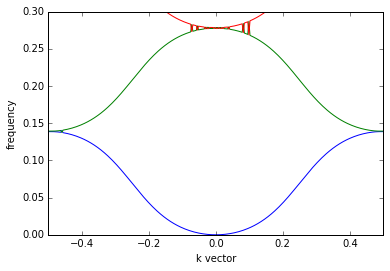

In [55]:
k0, k = build_bandgap_diagram(13, 13, num_eigs)
for i in range(num_eigs):
    plt.hold(True)
    plt.plot(k0, k[i,:],'-')
    
plt.xlabel("k vector")
plt.ylabel("frequency")
plt.xlim([-0.5, 0.5])
plt.ylim([0.0, 0.3])

### $\epsilon_1 = 13, \epsilon_2 = 12$

(0.0, 0.3)

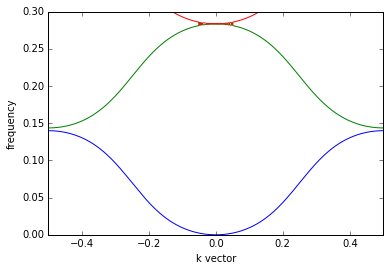

In [44]:
k0, k = build_bandgap_diagram(13, 12, num_eigs)
for i in range(num_eigs):
    plt.hold(True)
    plt.plot(k0, k[i,:],'-')
    
plt.xlabel("k vector")
plt.ylabel("frequency")
plt.xlim([-0.5, 0.5])
plt.ylim([0.0, 0.3])

### $\epsilon_1 = 13, \epsilon_2 = 1$

(0.0, 0.3)

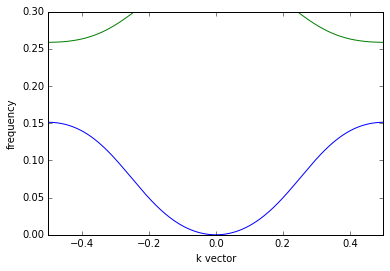

In [45]:
k0, k = build_bandgap_diagram(13, 1, num_eigs)
for i in range(num_eigs):
    plt.hold(True)
    plt.plot(k0, k[i,:],'-')
    
plt.xlabel("k vector")
plt.ylabel("frequency")
plt.xlim([-0.5, 0.5])
plt.ylim([0.0, 0.3])